<a href="https://colab.research.google.com/github/mirzafaradiba01/Mirza-Faradiba/blob/main/K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#library
import cv2
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
#input gambar
image = plt.imread('cute.jpg')

# normalisasi gambar
image = image / 255.

#membentuk kembali gambar karena algoritma kmeans mengambil data 2D sebagai input sehingga gambar 3D dikonversi menjadi gambar 2D
image_reshaped = image.reshape(image.shape[0]*image.shape[1], image.shape[2])
print("Shape of original image {}".format(image.shape)) #bentuk gambar original
print("Shape of reshaped image {}".format(image_reshaped.shape)) #Bentuk gambar yang dibentuk ulang 

Shape of original image (564, 564, 3)
Shape of reshaped image (318096, 3)


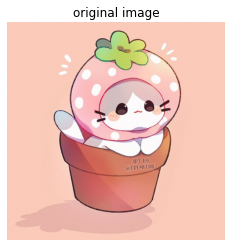

In [ ]:
#menampilkan gambar asli
plt.axis('off')
plt.title("original image")
plt.imshow(image)

In [ ]:
# mengembalikan cluster piksel dari suatu gambar

def kmeans_over_image(number_of_clusters, org_image, reshaped_image):

  kmeans = KMeans(n_clusters=number_of_clusters, random_state=0) #Menentukan dan mengkonfigurasi fungsi kmeans
  kmeans = kmeans.fit(reshaped_image) #Menentukan kluster dari data
  image_cluster = kmeans.cluster_centers_[kmeans.labels_] #Menampilkan pusat cluster 

  # membentuk kembali ukuran gambar dari 2D ke 3D
  image_cluster = image_cluster.reshape(org_image.shape[0], org_image.shape[1], org_image.shape[2])

  return image_cluster

In [ ]:
# untuk menyimpan klaster gambar 
clustered_images = []

# jumlah klaster
no_cluster = []

# untuk contoh
# membentuk cluster 2,4,6,8 atas gambar masukan

for cluster in range(2, 10, 2): # jangkauan
  # gambar -> gambar 3D asli
  # image_reshape ---> gambar 2D yang dibentuk ulang

  clustered_images.append(kmeans_over_image(cluster, image, image_reshaped))
  no_cluster.append(cluster)

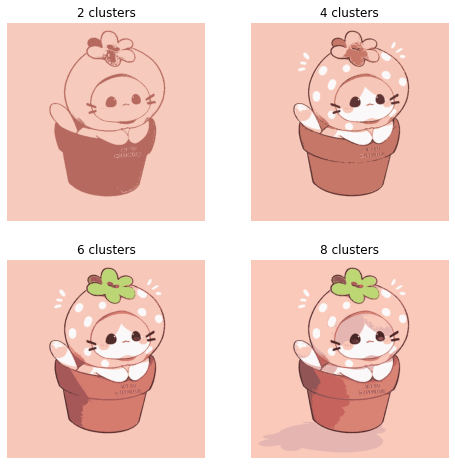

In [ ]:
#memplot gambar
import numpy as np

fig=plt.figure(figsize=(8, 8)) #mengubah ukuran gambar
columns = 2
rows = 2
iterate = 0

for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.axis("off")
    plt.title(str(no_cluster[iterate]) + " clusters")
    plt.imshow(clustered_images[iterate])
    iterate += 1
plt.show() # menampilkan objek visual